Maximo en largos inicial : [1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 3, 1, 2, 1, 1, 1, 2]
Promedio de islas inicial:  1.5294117647058822
Isla MAX inicial:  4
Isla MIN inicial :  1
Cantidad de islas inicial:  17
Cantidad de unos en iteración 1: 27
Cantidad de unos en iteración 2: 27
Cantidad de unos en iteración 3: 28
Cantidad de unos en iteración 4: 28
Cantidad de unos en iteración 5: 29
Cantidad de unos en iteración 6: 29
Cantidad de unos en iteración 7: 30
Cantidad de unos en iteración 8: 31
Cantidad de unos en iteración 9: 32
Cantidad de unos en iteración 10: 33
Cantidad de unos en iteración 11: 33
Cantidad de unos en iteración 12: 34
Cantidad de unos en iteración 13: 35
Cantidad de unos en iteración 14: 36
Cantidad de unos en iteración 15: 37
Cantidad de unos en iteración 16: 38
Densidad poblacional de unos: 0.1484375
Cantidad de unos en iteración 50: 62
Cantidad de unos en iteración 100: 81
Cantidad de unos en iteración 150: 95
Cantidad de unos en iteración 200: 104
Cantidad de unos en itera

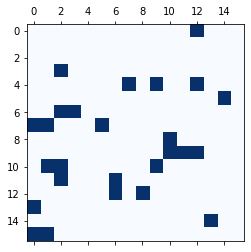

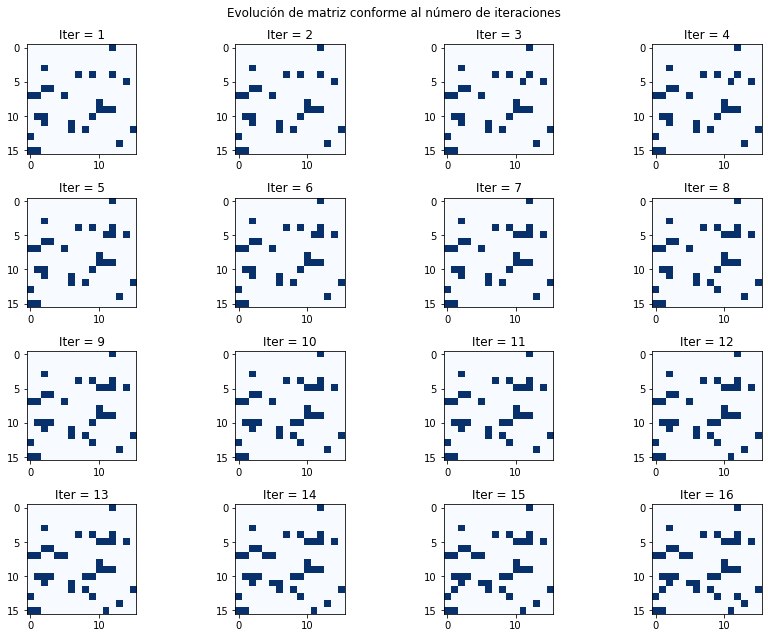

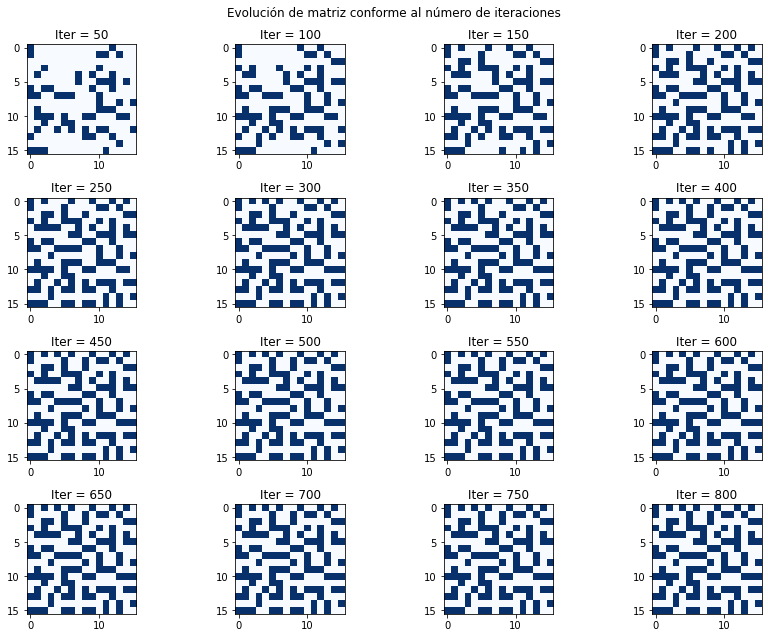

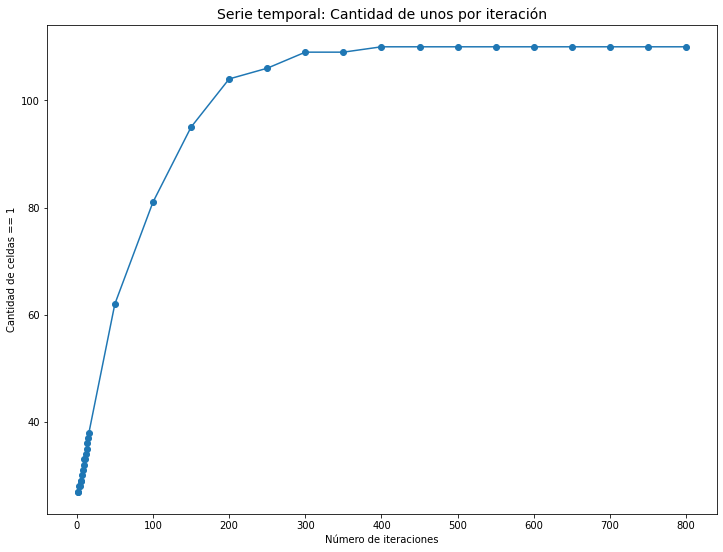

Maximo en largos: [2, 1, 1, 1, 1, 1, 1, 8, 2, 2, 1, 7, 2, 1, 1, 6, 1, 3, 3, 2, 2, 4, 5, 2, 1, 1, 1, 5, 9, 2, 3, 3, 1, 3, 4, 2, 2, 2, 2, 1, 3, 2, 2]
Promedio de islas:  2.5348837209302326
Isla MAX:  9
Isla MIN:  1
Cantidad de islas final:  43


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial.distance import cdist
from simulacion_8 import *


Maximo en largos inicial : [1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2]
Promedio de islas inicial:  1.3
Isla MAX inicial:  2
Isla MIN inicial :  1
Cantidad de islas inicial:  20
Cantidad de unos en iteración 1: 26
Cantidad de unos en iteración 2: 26
Cantidad de unos en iteración 3: 26
Cantidad de unos en iteración 4: 27
Cantidad de unos en iteración 5: 28
Cantidad de unos en iteración 6: 29
Cantidad de unos en iteración 7: 30
Cantidad de unos en iteración 8: 31
Cantidad de unos en iteración 9: 32
Cantidad de unos en iteración 10: 32
Cantidad de unos en iteración 11: 32
Cantidad de unos en iteración 12: 32
Cantidad de unos en iteración 13: 32
Cantidad de unos en iteración 14: 33
Cantidad de unos en iteración 15: 34
Cantidad de unos en iteración 16: 35
Densidad poblacional de unos: 0.13671875
Cantidad de unos en iteración 50: 67
Cantidad de unos en iteración 100: 90
Cantidad de unos en iteración 150: 103
Cantidad de unos en iteración 200: 105
Cantidad de unos en iteración

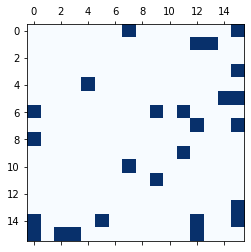

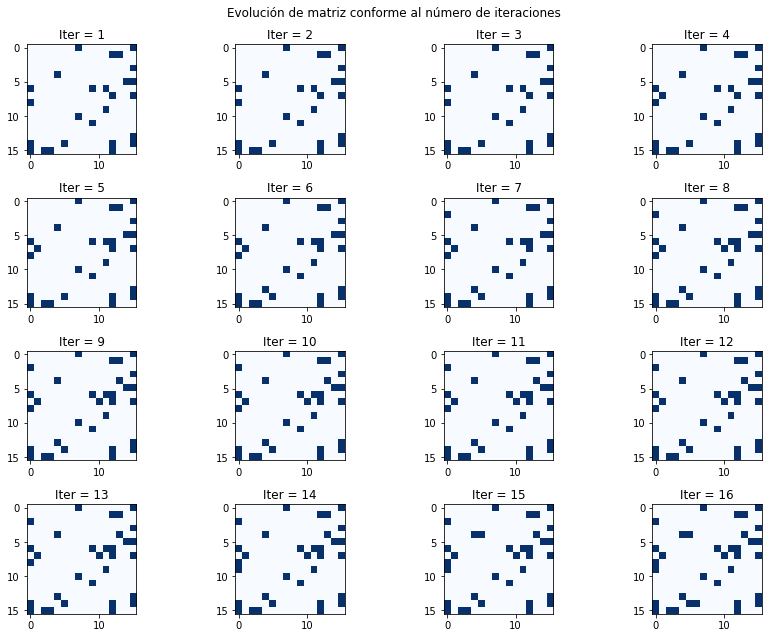

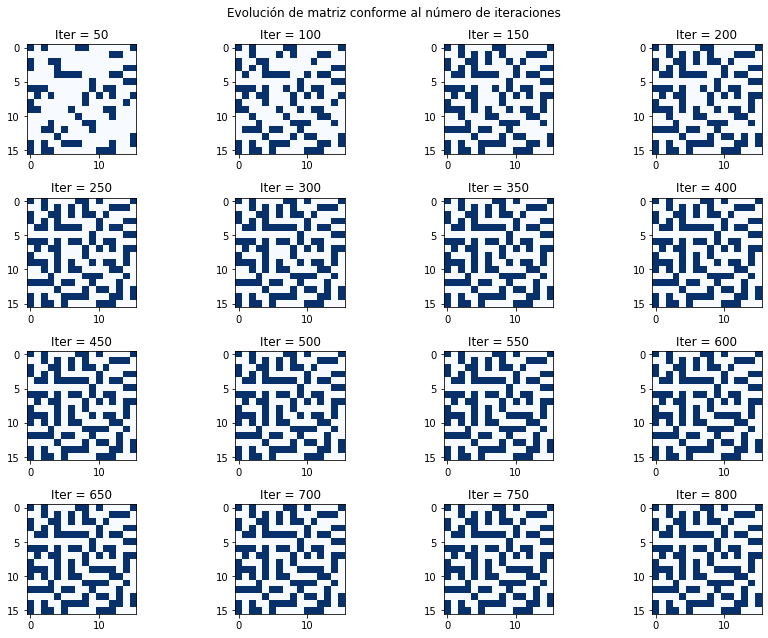

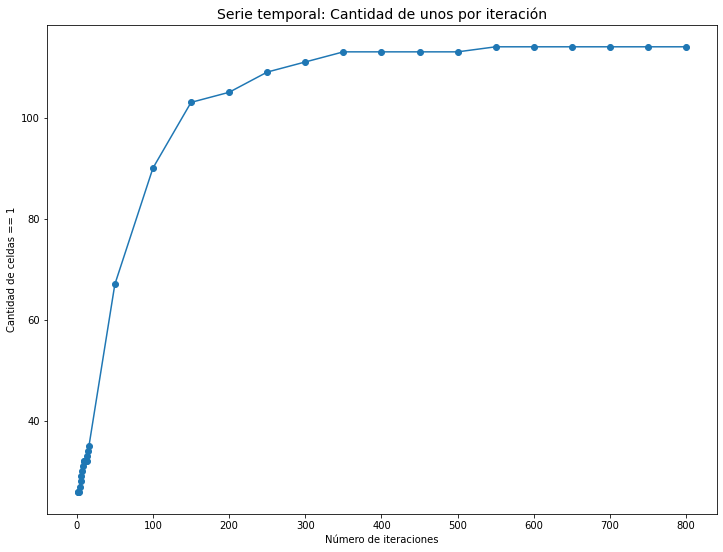

Maximo en largos: [1, 2, 5, 1, 1, 9, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 4, 6, 2, 3, 2, 1, 4, 6, 4, 6, 5, 5, 1, 2, 7, 1, 6, 2, 2, 2, 3]
Promedio de islas:  3.081081081081081
Isla MAX:  9
Isla MIN:  1
Cantidad de islas final:  37


In [2]:
# Sistema en posición inicial
M, N = 16, 16 # Columns, Rows
proporcion = 0.1  # Se pone la proporción de unos, ejemplo: 0.4 indica un 40% de unos.
phi_max = 2 #Phi máximo para considerar regla 5
phi_min = 1 # Phi mínimo para considerar regla 4
N_iteracion = 50 # Aquí se pone cada cuantas iteraciones quieres ver el gráfico

grid = np.array(create_grid(M, N, proporcion))
# No olvidar de definir la matriz de probabilidad cada vez que se cree
# una nueva matriz de valores.
p = [0.8, 0.7, 0.6, 0.4, 0.3, 0.25, 0.2, 0.1, 0.01, 0.005, 0.003, 0.001]
p_grid = create_p_grid(grid, p)
#print('Matriz inicial:')
#print(grid)
#print('---------------------------------------------------------------------------------------------------------------')

fig, ax = plt.subplots()

 ################## RRESULTADOS ###########################

# Imprimiremos la matriz inicial

ax.matshow(grid, cmap=plt.cm.Blues)
 

#---------Estimación de largos inicial------------#

print("Maximo en largos inicial :", estimacionRapidoDeLargos(grid))

data=estimacionRapidoDeLargos(grid)
mean=sum(data)/len(data)

print("Promedio de islas inicial: ", mean)
Max_value=max(data)
print("Isla MAX inicial: ", Max_value)
Min_value=min(data)
print("Isla MIN inicial : ",Min_value)
Largoi=len(data)
print("Cantidad de islas inicial: ",Largoi)


#______________________________________-

time_serie = plot_matrix(1, (4, 4), grid, p_grid, 5, phi_min, phi_max)


time_serie2 = plot_matrix(N_iteracion, (4, 4), grid, p_grid, 5, phi_min, phi_max)


t1 = time_serie[0]
t1 = t1 + time_serie2[0]
t2 = time_serie[1]
t2 = t2 + time_serie2[1]
print('>>', (t1, t2))


plot_ts((t1, t2)) # Aquí se grafica la serie de tiempo
plt.show()


#---------Distancia promedio 1 ------------#

#-------------------------- Distancia promedio de 1s --------------------------#
#------------------------------------------------------------------------------#

#Esta función toma una matriz de 1s y 0s, y retorna la distancia promedio entre todos los 1s
def distanciaPromedio1s(matriz):
  #Primero hay que encontrar todas las ubicaciones de los 1s
  coor_1s = []
  for ind1 in range(matriz.shape[0]):
    for ind2 in range(matriz.shape[1]):
      if (matriz[ind1, ind2]): coor_1s += [np.array([ind1, ind2])]
  #Luego sólo hay que sumar las distancias
  n_distancias = len(coor_1s)*(len(coor_1s)-1)/2 #(Fórmula del número triangular)
  distancia_promedio = 0
  for coor1 in range(len(coor_1s)-1):
    for coor2 in range(coor1+1, len(coor_1s)):
      distancia_promedio += np.abs(coor_1s[coor1] - coor_1s[coor2]).sum()
  #Y, finalmente, sólo queda dividirlas por el número de distancias sumadas
  distancia_promedio /= n_distancias
  return distancia_promedio

#print('Distancia promedio entre 1s:', distanciaPromedio1s(grid))



#---------Estimación de largos final ------------#

print("Maximo en largos:", estimacionRapidoDeLargos(grid))

data=estimacionRapidoDeLargos(grid)
mean=sum(data)/len(data)

print("Promedio de islas: ", mean)
Max_value=max(data)
print("Isla MAX: ", Max_value)
Min_value=min(data)
print("Isla MIN: ",Min_value)
Largoi=len(data)
print("Cantidad de islas final: ",Largoi)
